<a href="https://colab.research.google.com/github/HamishjHartley/Android_Basics/blob/main/CW2_emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

---




### Overview

### Method

In [2]:
import keras
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras import layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#### Data exploration

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
#Load Datasets
raw_train_df = pd.read_csv('gdrive/My Drive/my_emotion_train.csv')
raw_test_df = pd.read_csv('gdrive/My Drive/my_emotion_test.csv')

In [7]:
# Split the 'pixels' column into individual pixel values
raw_train_df['pixels'] = raw_train_df['pixels'].apply(lambda x: np.array(x.split()).astype(float))

# Convert 'pixels' column to numpy array
X = np.array(raw_train_df['pixels'].tolist())

# Normalize pixel values to range [0, 1]
X = X / 255.0

# Convert 'id' column to categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(raw_train_df['emotion'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
#Mapping int labels to String categories
label_map = {0: "Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}

#Defining image size
image_size = (48,48)

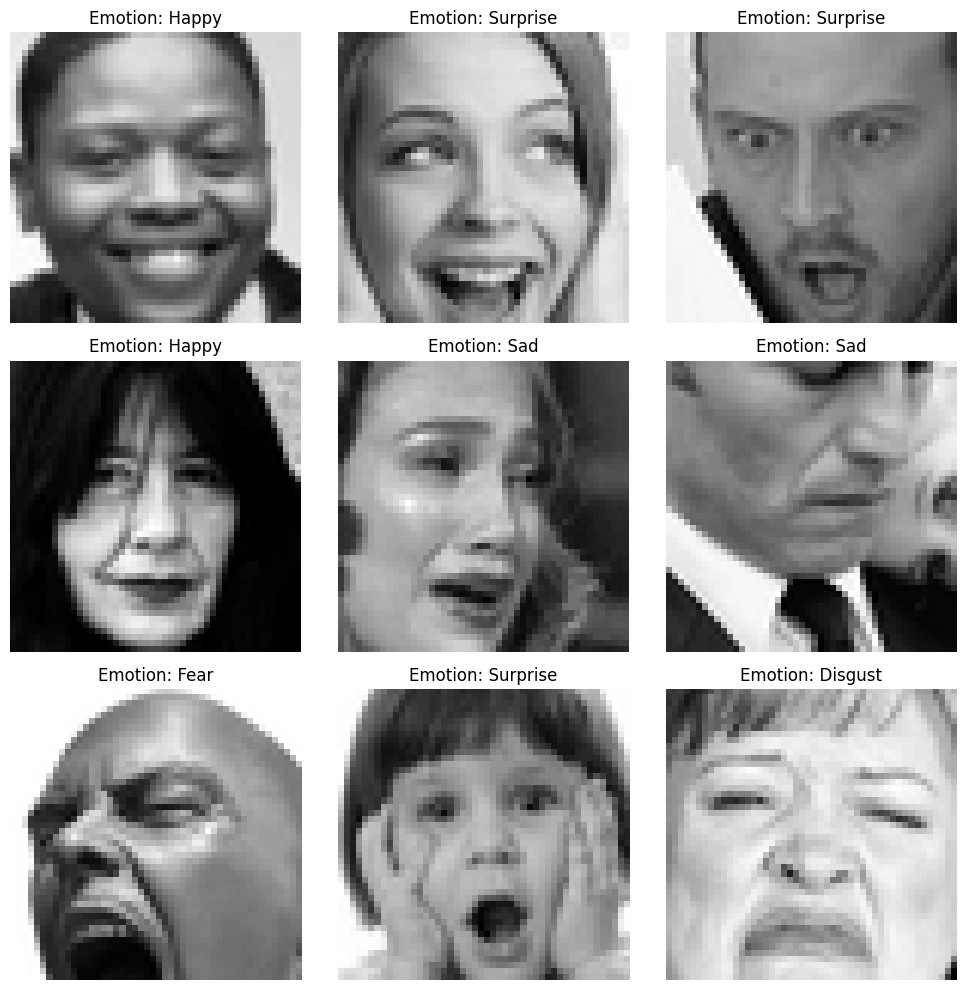

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(image_size), cmap='gray')
    ax.set_title(f'Emotion: {label_map[label_encoder.inverse_transform([y_train[i]])[0]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
raw_train_df.head()

,id,emotion,pixels
0,9415,6,29 16 18 18 18 20 19 18 17 17 17 18 17 18 17 1...
1,19109,3,126 154 167 181 188 194 195 194 196 195 198 20...
2,21523,2,169 220 218 208 184 144 72 73 143 183 203 210 ...
3,2076,3,60 64 72 80 83 83 80 82 89 106 114 125 125 127...
4,13957,3,174 148 121 97 78 70 62 57 54 54 42 58 40 64 1...


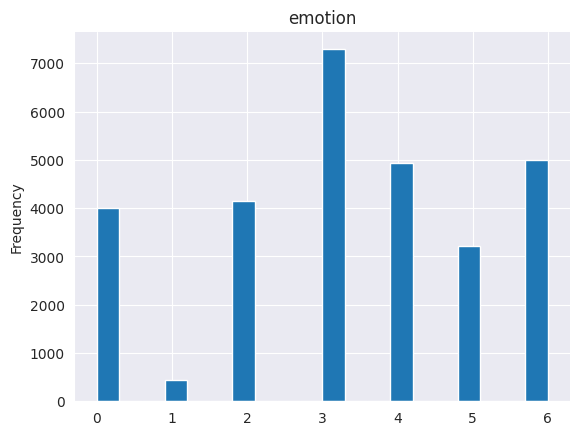

In [ ]:
raw_train_df['emotion'].plot(kind='hist', bins=20, title='emotion')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Strategy

#### Data augmentation

In [ ]:
#Applying random horizontal fliping to expose the model to alternative aspects of the training data
#Also avoiding over fitting
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images


### Models

#### Standard Baseline

In [ ]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(29000, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/5
725/725 [==============================] - 138s 186ms/step - loss: 1.8845 - accuracy: 0.2557 - val_loss: 1.7788 - val_accuracy: 0.2624
Epoch 2/5
725/725 [==============================] - 126s 174ms/step - loss: 1.7223 - accuracy: 0.3142 - val_loss: 1.6747 - val_accuracy: 0.3493
Epoch 3/5
725/725 [==============================] - 128s 176ms/step - loss: 1.6806 - accuracy: 0.3367 - val_loss: 1.6599 - val_accuracy: 0.3438
Epoch 4/5
725/725 [==============================] - 131s 181ms/step - loss: 1.6498 - accuracy: 0.3510 - val_loss: 1.6771 - val_accuracy: 0.3286
Epoch 5/5
162/725 [=====>........................] - ETA: 1:36 - loss: 1.6330 - accuracy: 0.3511

#### Deep NN models

In [ ]:
#Relu activation function

#### Complex NN models

### Results

#### Table of results

#### Interpretation of results

### Summary

#### Final Model

#### Kaggle perfomance

#### Future work

### References



##### Raz Lapid and Moshe Sipper. 2022. Evolution of activation functions for deep learning-based image classification. In Proceedings of the Genetic and Evolutionary Computation Conference Companion (GECCO '22). Association for Computing Machinery, New York, NY, USA, 2113–2121. https://doi.org/10.1145/3520304.3533949